In [4]:
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from tools import pose_detection
from ultralytics import YOLO

In [6]:
model = YOLO("models/yolov8n-pose.pt") 

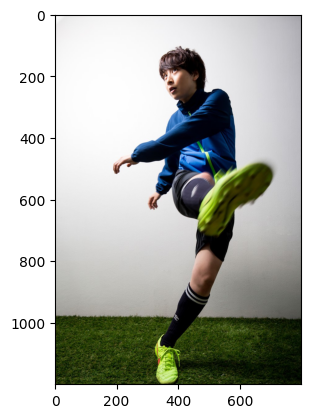

In [21]:
img_pic= np.array(Image.open("sample.jpg"))
plt.imshow(img_pic)

In [8]:
pose_detection(img_pic, model)


0: 640x448 1 person, 191.2ms
Speed: 0.0ms preprocess, 191.2ms inference, 1328.2ms postprocess per image at shape (1, 3, 640, 448)


(array([        188,          96,         703,        1200], dtype=float32),
 array([[      371.7,      221.71,     0.98981],
        [     395.56,      197.69,      0.9779],
        [     357.54,      201.09,     0.91334],
        [     461.08,      191.92,     0.89437],
        [          0,           0,     0.36947],
        [     511.17,      275.65,     0.98891],
        [     400.06,      321.94,     0.99457],
        [     431.91,      363.55,     0.96004],
        [      386.4,      489.95,     0.98105],
        [     284.32,      436.64,     0.96338],
        [     349.44,      571.64,     0.98136],
        [     553.37,      598.29,     0.99433],
        [     479.26,         606,     0.99677],
        [     458.14,      837.41,     0.98048],
        [     447.11,      845.21,     0.98896],
        [     368.28,      1054.1,     0.72648],
        [     425.18,        1071,     0.80928]], dtype=float32))

In [16]:
result = model(img_pic)


0: 640x448 1 person, 123.2ms
Speed: 1.8ms preprocess, 123.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 448)


In [ ]:
def pose_detection(img, model):
    result = model(img_pic)
    bbox_data = result[0].boxes.xyxy[0].cpu().numpy()
    keypoints_data = result[0].keypoints.data[0].cpu().numpy()
    return bbox_data, keypoints_data

In [35]:
result = model(img_pic)
bbox_data = result[0].boxes.xyxy.cpu().numpy()
keypoints_data = result[0].keypoints.data.cpu().numpy()


0: 640x448 1 person, 132.4ms
Speed: 1.2ms preprocess, 132.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


In [36]:
type(bbox_data)

numpy.ndarray

In [19]:
bbox_data[0]

array([        188,          96,         703,        1200], dtype=float32)

In [23]:
import cv2

result = model(img_pic)
bbox_data = result[0].boxes.xyxy.cpu().numpy()
keypoints_data = result[0].keypoints.data.cpu().numpy()

for i in range(len(bbox_data)):
    # draw bbox
    left, top, right, bottom = bbox_data[i]
    print(left, top, right, bottom)
    cv2.rectangle(img_pic, (left, top), (right, bottom), (255,0,0), 2, 1)


0: 640x448 1 person, 165.4ms
Speed: 5.0ms preprocess, 165.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)
188.0 97.0 703.0 1200.0


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


In [26]:
bbox_data.astype("int")

array([[ 188,   97,  703, 1200]])

In [30]:
keypoints_data[0]

array([[     372.07,      221.91,      0.9898],
       [     395.89,      197.94,     0.97784],
       [     357.86,      201.31,     0.91371],
       [     461.19,      192.17,     0.89401],
       [          0,           0,     0.37182],
       [      511.2,      275.88,     0.98889],
       [     400.16,      322.01,     0.99458],
       [     431.97,      363.76,     0.95994],
       [     386.48,      489.87,     0.98111],
       [     284.31,      436.73,     0.96326],
       [     349.53,      571.64,     0.98139],
       [     553.32,      598.26,     0.99433],
       [     479.26,       605.9,     0.99678],
       [     458.22,      837.41,      0.9805],
       [     447.23,      845.05,     0.98899],
       [     368.27,      1054.2,     0.72695],
       [     425.16,        1071,      0.8098]], dtype=float32)

In [32]:
points_dict = {
	1: {"label":"nose"},
	2: {"label":"left_eye"},
	3: {"label":"right_eye"},
	4: {"label":"left_ear"},
	5: {"label":"right_ear"},
	6: {"label":"left_shoulder"},
	7: {"label":"right_shoulder"},
	8: {"label":"left_elbow"},
	9: {"label":"right_elbow"},
	10: {"label":"left_wrist"},
	11: {"label":"right_wrist"},
	12: {"label":"left_hip"},
	13: {"label":"right_hip"},
	14: {"label":"left_knee"},
	15: {"label":"right_knee"},
	16: {"label":"left_ankle"},
	17: {"label":"right_ankle"}
	}

In [34]:
data = keypoints_data[i]

def generate_keypoints_dict(data):
	points_dict = {
		1: {"label":"nose"},
		2: {"label":"left_eye"},
		3: {"label":"right_eye"},
		4: {"label":"left_ear"},
		5: {"label":"right_ear"},
		6: {"label":"left_shoulder"},
		7: {"label":"right_shoulder"},
		8: {"label":"left_elbow"},
		9: {"label":"right_elbow"},
		10: {"label":"left_wrist"},
		11: {"label":"right_wrist"},
		12: {"label":"left_hip"},
		13: {"label":"right_hip"},
		14: {"label":"left_knee"},
		15: {"label":"right_knee"},
		16: {"label":"left_ankle"},
		17: {"label":"right_ankle"}
		}

	for i in range(17):
		x, y, conf = data[i]
		points_dict[i+1]["xy"]=(x, y)
		
		if x == 0 and y == 0:
			visibility = 0
		elif conf < 0.5:
			visibility = 1
		else:
			visibility = 2
		
		points_dict[i+1]["visibility"]= visibility

	return points_dict

NameError: name 'keypoints_data_' is not defined